In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("E:\markov ml\Python day2\Python day2\churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
for i in df.columns:
    print(i)
    print(df[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [4]:
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True)
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(17), object(3)
memory 

In [5]:
df['gender'].replace(['Female','Male'], [0,1], inplace = True)
df['SeniorCitizen'].replace( [0,1] , [0,1], inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [6]:
df['TotalCharges'].replace(" ", 0, inplace = True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), object(1)
memory 

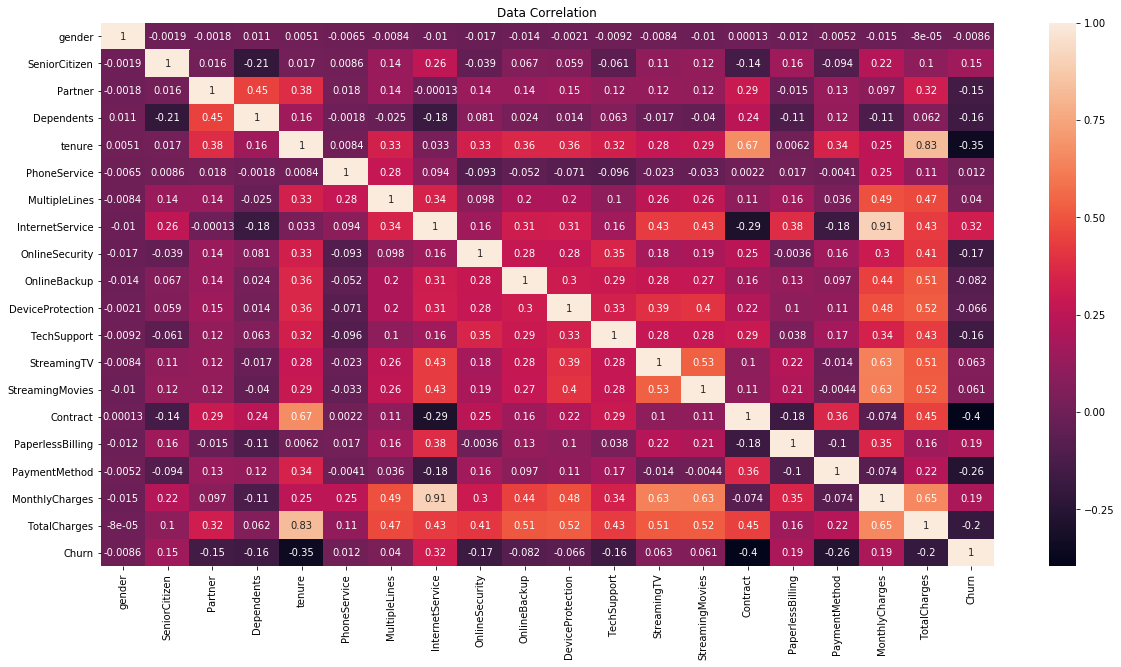

In [7]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(df.corr(), annot = True)

In [8]:
df = df.drop([ 'customerID', 'TotalCharges' , 'InternetService'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(1), int64(17)
memory usage: 990.5 KB


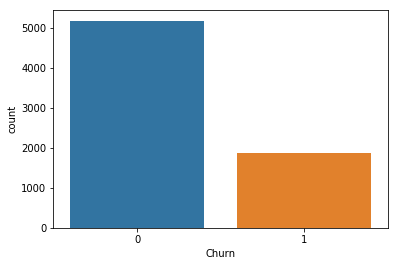

In [9]:
sns.countplot('Churn', data = df)

In [10]:
df['stand_tenure']=StandardScaler().fit_transform(df['tenure'].values.reshape(-1, 1))
df['stand_monthly']=StandardScaler().fit_transform(df['MonthlyCharges'].values.reshape(-1, 1))
df.drop(['tenure', 'MonthlyCharges'], axis=1, inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


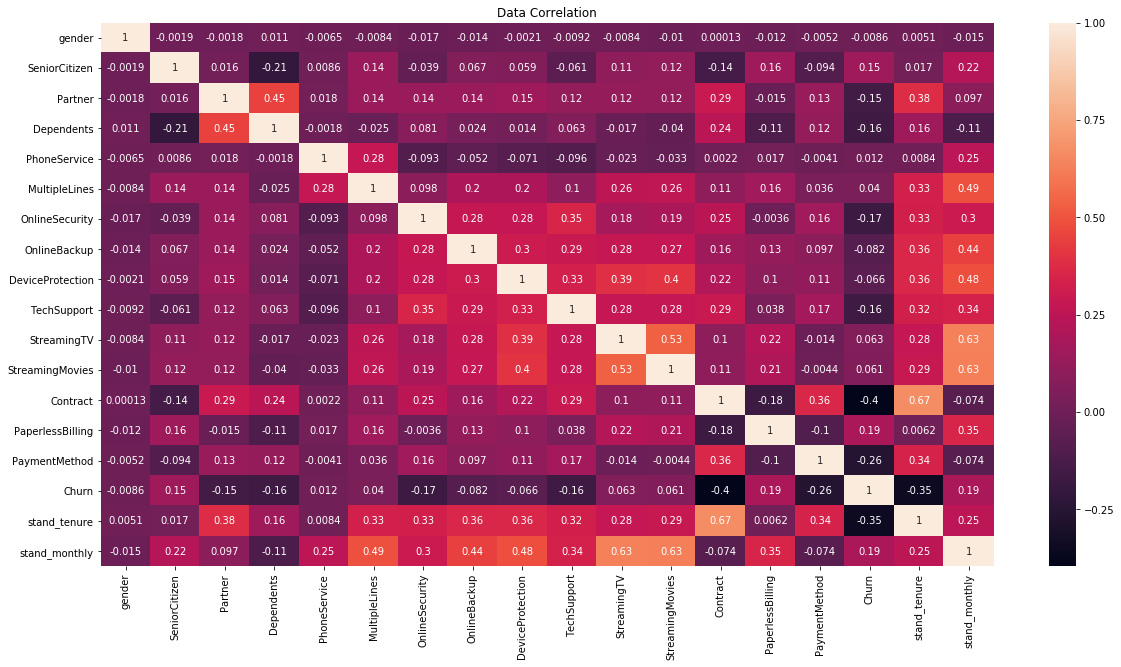

In [11]:
plt.subplots(figsize = (20,10))
plt.title("Data Correlation")
sns.heatmap(df.corr(), annot = True)

In [12]:
X = df.iloc[:, df.columns != 'Churn']
Y = df.iloc[:, df.columns == 'Churn']
number_of_churns = len(df[df['Churn']==1])
number_of_nonchurns = len(df[df['Churn']==0])
print(number_of_churns, number_of_nonchurns)

churn_index = np.array(df[df.Churn ==1].index)
nonchurn_index = np.array(df[df.Churn ==0].index)
random_nonchurn_indexs = np.random.choice(nonchurn_index, number_of_churns)
balanced_index = np.concatenate([random_nonchurn_indexs, churn_index])
balanced_data = df.iloc[balanced_index, :]
X_balanced = balanced_data.iloc[:, balanced_data.columns != 'Churn']
Y_balanced = balanced_data.iloc[:, balanced_data.columns == 'Churn']
X_balanced_train, X_balanced_test, y_balanced_train, y_balanced_test = train_test_split(X_balanced, Y_balanced, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print("Percentage of non churns: ", len(balanced_data[balanced_data.Churn == 0])/len(balanced_data))
print("Percentage of churns: ", len(balanced_data[balanced_data.Churn == 1])/len(balanced_data))
print("Total number of resampled data: ", len(balanced_data))
print("Number transactions train dataset: ", len(X_balanced_train))
print("Number transactions test dataset: ", len(X_balanced_test))
print("Total number of transactions: ", len(X_balanced_train)+len(X_balanced_test))
print("")
print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

1869 5174
Percentage of non churns:  0.5
Percentage of churns:  0.5
Total number of resampled data:  3738
Number transactions train dataset:  2616
Number transactions test dataset:  1122
Total number of transactions:  3738

Number transactions train dataset:  4930
Number transactions test dataset:  2113
Total number of transactions:  7043


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall metric in the testing dataset:  0.8119349005424955
Total set: 1122


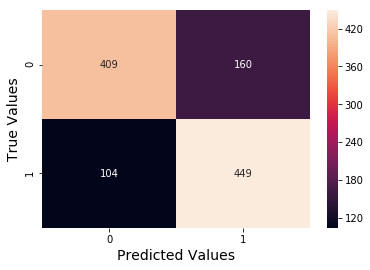

In [13]:
lr = LogisticRegression()
lr.fit(X_balanced_train, y_balanced_train.values.ravel())

y_balanced_pred = lr.predict(X_balanced_test)
cnf_matrix = confusion_matrix(y_balanced_test, y_balanced_pred)
sns.heatmap(cnf_matrix, annot = True, fmt = 'd')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Total set:", cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])

In [14]:
from sklearn.neighbors import KNeighborsClassifier

Recall metric in the testing dataset:  0.8354430379746836
Total set: 1122


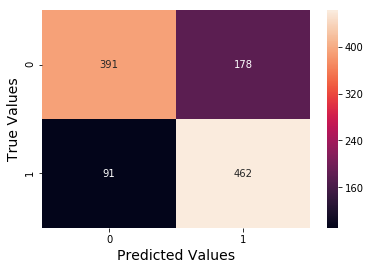

In [17]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_balanced_train, y_balanced_train.values.ravel())

y_pred = knn.predict(X_balanced_test)


cnf_matrix = confusion_matrix(y_balanced_test, y_pred)
sns.heatmap(cnf_matrix, annot = True, fmt = 'd')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)
print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Total set:", cnf_matrix[0,0]+cnf_matrix[0,1]+cnf_matrix[1,0]+cnf_matrix[1,1])

Recall metric in the testing dataset:  0.8469945355191257
Total set: 2113


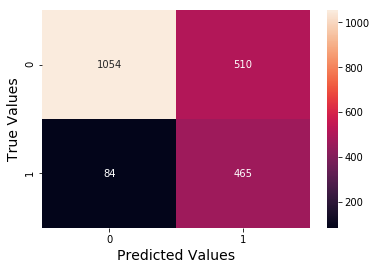

In [18]:
y_pred2 = knn.predict(X_test)

cnf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cnf_matrix2, annot = True, fmt = 'd')
plt.ylabel('True Values', fontsize = 14)
plt.xlabel('Predicted Values', fontsize = 14)
print("Recall metric in the testing dataset: ", cnf_matrix2[1,1]/(cnf_matrix2[1,0]+cnf_matrix2[1,1]))
print("Total set:", cnf_matrix2[0,0]+cnf_matrix2[0,1]+cnf_matrix2[1,0]+cnf_matrix2[1,1])